In [1]:
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import seaborn as sns

from habanero import Crossref

https://www.wikidata.org/wiki/Q15752370

In [2]:
cr = Crossref()

In [13]:
r = cr.members(ids=2984, works=True, facet="issn:*", limit=0)

In [35]:
plt.rcParams["figure.figsize"] = (8, 6)

In [36]:
data_dir = Path("../data")
nb_dir = data_dir / "coverage"

In [37]:
# Load Scopus coverage
scopus = pd.read_csv(nb_dir / "scopus/CiteScore_2019.csv", index_col="Scopus Source ID")

# Load Web of Science coverage
dfs = []
for file in (nb_dir / "wos").glob("wos-core*.csv"):
    dfs.append(pd.read_csv(file))
wos = pd.concat(dfs)

# Load Scite data
scite = pd.read_csv(nb_dir / "scite/touched-issns.csv")

In [45]:
quant = scite.total_processed_papers.quantile(.5)
papers = (scite.total_processed_papers>=quant).sum()

print(quant, papers)

35.0 52341


In [44]:
scite.describe()

,total_papers,total_processed_papers,percent_complete
count,104507.000000,104507.000000,104507.000000
mean,1227.362521,312.222119,32.753423
std,6571.745905,1837.011796,28.895089
min,1.000000,1.000000,0.000000
25%,60.500000,8.000000,8.000000
50%,196.000000,35.000000,24.000000
75%,737.000000,161.000000,54.000000
max,487523.000000,230437.000000,100.000000


In [46]:
scopus_issns = set(scopus["Print ISSN"].tolist() + scopus["E-ISSN"].tolist())
wos_issns = set(wos.ISSN.str.replace("-", "").tolist() + wos.eISSN.str.replace("-", "").tolist())


scite_issns = set(scite[scite.total_processed_papers>=quant].issn.str.replace("-", ""))

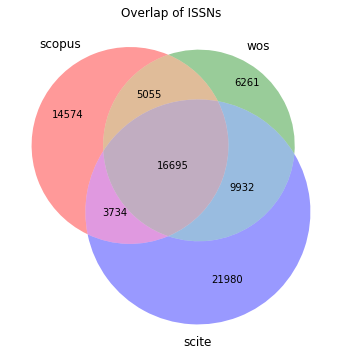

In [47]:
venn3(subsets=[scopus_issns, wos_issns, scite_issns], set_labels=["scopus", "wos", "scite"])
plt.title("Overlap of ISSNs");

In [81]:
scopus["Publisher"].value_counts()

Springer Nature                                          6325
Elsevier                                                 5901
Taylor & Francis                                         5315
Wiley-Blackwell                                          3393
SAGE                                                     1841
                                                         ... 
Ecole Nationale du Genie Rural des Eaux et des Forets       1
Societas Philosophia Classica                               1
Research and publications office, Jimma University          1
Peritoneal Dialysis Bulletin                                1
Massimo Morgante                                            1
Name: Publisher, Length: 6892, dtype: int64

In [83]:
wos["Publisher name"].value_counts()

WILEY                                          4919
SPRINGER                                       3561
ROUTLEDGE JOURNALS, TAYLOR & FRANCIS LTD       2577
ELSEVIER                                       2373
TAYLOR & FRANCIS LTD                           1831
                                               ... 
EGYPTIAN GEOLOGICAL SURVEY MINING AUTHORITY       1
CANADIAN SOC CONTINENTAL PHILOSOPHY               1
EDITORA FORUM                                     1
INST GEOLOGICO MINERO METALURGICO-INGEMMET        1
FUKUI NATURE CONSERVATION CENTER                  1
Name: Publisher name, Length: 7955, dtype: int64

In [59]:
scopus[scopus.Publisher=="Cambridge University Press"].drop_duplicates(subset=["Print ISSN", "E-ISSN"])

,Title,Citation Count,Scholarly Output,Percent Cited,CiteScore,SNIP,SJR,Scopus ASJC Code (Sub-subject Area),Scopus Sub-Subject Area,Percentile,RANK,Rank Out Of,Publisher,Type,Open Access,Quartile,Top 10% (CiteScore Percentile),URL Scopus Source ID,Print ISSN,E-ISSN
Scopus Source ID,,,,,,,,,,,,,,,,,,,,
12128,Behavioural and Cognitive Psychotherapy,652,226,70.8,2.9,0.981,0.805,3203.0,Clinical Psychology,68.0,88.0,275.0,Cambridge University Press,j,NO,2.0,0,https://www.scopus.com/sourceid/12128,13524658,14691833
21100455134,Queensland Review,10,79,10.1,0.1,0.013,0.105,3312.0,Sociology and Political Science,12.0,1090.0,1243.0,Cambridge University Press,j,NO,4.0,0,https://www.scopus.com/sourceid/21100455134,13218166,20497792
23953,"Rural History: Economy, Society, Culture",32,47,44.7,0.7,0.888,0.135,3305.0,"Geography, Planning and Development",31.0,467.0,679.0,Cambridge University Press,j,NO,3.0,0,https://www.scopus.com/sourceid/23953,9567933,14740656
12256,Cambridge Law Journal,108,116,41.4,0.9,1.347,0.412,3308.0,Law,53.0,321.0,685.0,Cambridge University Press,j,NO,2.0,0,https://www.scopus.com/sourceid/12256,81973,14692139
21100899217,Wireless Power Transfer,121,46,71.7,2.6,0.406,0.252,2102.0,Energy Engineering and Power Technology,57.0,92.0,216.0,Cambridge University Press,j,NO,2.0,0,https://www.scopus.com/sourceid/21100899217,NaN,20528418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900191623,AJS Review,25,51,27.5,0.5,0.716,0.203,1212.0,Religious Studies,78.0,106.0,492.0,Cambridge University Press,j,NO,1.0,0,https://www.scopus.com/sourceid/19900191623,3640094,14754541
23144,Language in Society,330,108,65.7,3.1,2.208,1.027,1203.0,Language and Linguistics,93.0,51.0,830.0,Cambridge University Press,j,NO,1.0,1,https://www.scopus.com/sourceid/23144,474045,14698013
25301,Bulletin of Symbolic Logic,67,51,41.2,1.3,1.796,0.361,1211.0,Philosophy,84.0,92.0,606.0,Cambridge University Press,j,NO,1.0,0,https://www.scopus.com/sourceid/25301,10798986,NaN


In [76]:
wos[wos["Publisher name"] == "CAMBRIDGE UNIV PRESS"]["Journal title"].nunique()

355